In [1]:
import pandas as pd
import sqlite3
import numpy as np

pd.set_option('display.max_columns', 500)

In [2]:
conn_1 = sqlite3.connect('../data/raw/batch_1.db')
conn_2 = sqlite3.connect('../data/raw/batch_2.db')
conn_test = sqlite3.connect('../data/raw/test.db')
fuel = pd.read_parquet('../data/raw/fuel.parquet')  # Daily gas prices from 04/01/16 to 31/12/18

In [3]:
fuel.shape

(750, 2)

## Explo batch 1

In [7]:
aeroports_1 = pd.read_sql_query("SELECT * FROM aeroports", conn_1)
aeroports_1.head()

,CODE IATA,NOM,LIEU,PAYS,LONGITUDE,LATITUDE,HAUTEUR,PRIX RETARD PREMIERE 20 MINUTES,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES
0,MCT,Muscat International Airport,Muscat,OM,58.284400939941406,23.593299865722656,48.0,53,3
1,SOU,Southampton Airport,Southampton,GB,-1.3567999601364136,50.95029830932617,44.0,24,5
2,PNH,Phnom Penh International Airport,Phnom Penh,KH,104.84400177001953,11.546600341796875,40.0,33,3
3,BLR,Kempegowda International Airport,Bangalore,IN,77.706299,13.1979,3000.0,70,9
4,FFD,RAF Fairford,Fairford,GB,-1.7900300025900002,51.6822013855,286.0,65,3


In [8]:
aeroports_1.shape

(321, 9)

In [9]:
compagnies_1 = pd.read_sql_query("SELECT * FROM compagnies", conn_1)
compagnies_1.head()

,COMPAGNIE,CODE,NOMBRE D EMPLOYES,CHIFFRE D AFFAIRE
0,Try Hard Airlines,THA,12909,2310000000
1,Corporate Overlord Airways,COA,130595,40579000000
2,Neverland Airlines,NA,18567,7651000000
3,Always A Problem Flights,AAPF,92000,51000000000
4,Overpriced Air,OA,12200,6649000000


In [10]:
compagnies_1.shape

(13, 4)

In [11]:
vols_1 = pd.read_sql_query("SELECT * FROM vols", conn_1)
vols_1.head()

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,COMPAGNIE AERIENNE,NOMBRE DE PASSAGERS,DATE,NIVEAU DE SECURITE
0,1259209,4661,a02782cd75,CEB,AAL,1707,1658.0,-9.0,20.0,1718.0,67.0,71.0,45.0,232,1803.0,6.0,1814,1809.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,MAF,379,15/8/2018,10
1,4886177,5026,707f6ea54f,GOI,LTK,600,553.0,-7.0,11.0,604.0,130.0,119.0,91.0,738,835.0,17.0,910,852.0,-18.0,0,0,None,NaN,NaN,NaN,NaN,NaN,I6F,9,2/11/2016,10
2,183332,2021,b116987956,DSS,JNB,1749,1747.0,-2.0,9.0,1756.0,248.0,228.0,215.0,1671,1831.0,4.0,1857,1835.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,NVPPA,2491,9/6/2017,10
3,937517,1320,a4b8db63f5,AGP,GOA,2301,2322.0,21.0,19.0,2341.0,65.0,89.0,59.0,214,40.0,11.0,6,51.0,45.0,0,0,None,24.0,0.0,0.0,6.0,15.0,NVPPA,1241,26/5/2018,10
4,2157498,508,34604053c0,BRU,BOD,612,603.0,-9.0,13.0,616.0,302.0,259.0,238.0,2288,1314.0,8.0,1414,1322.0,-52.0,0,0,None,NaN,NaN,NaN,NaN,NaN,THA,78,10/11/2018,10


In [12]:
vols_1.shape

(3000000, 31)

In [13]:
prix_fuel_1 = pd.read_sql_query("SELECT * FROM prix_fuel", conn_1)
prix_fuel_1.head()

,DATE,PRIX DU BARIL
0,38.75,59.792477
1,36.76,59.792477
2,36.18,59.792477
3,34.09,59.792477
4,33.30,59.792477


In [14]:
prix_fuel_1.shape

(750, 2)

## Explo batch 2

In [15]:
aeroports_2 = pd.read_sql_query("SELECT * FROM aeroports", conn_2)
aeroports_2.head()

,CODE IATA,NOM,LIEU,PAYS,LONGITUDE,LATITUDE,HAUTEUR,PRIX RETARD PREMIERE 20 MINUTES,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES
0,MCT,Muscat International Airport,Muscat,OM,58.284400939941406,23.593299865722656,48.0,53,3
1,SOU,Southampton Airport,Southampton,GB,-1.3567999601364136,50.95029830932617,44.0,24,5
2,PNH,Phnom Penh International Airport,Phnom Penh,KH,104.84400177001953,11.546600341796875,40.0,33,3
3,BLR,Kempegowda International Airport,Bangalore,IN,77.706299,13.1979,3000.0,70,9
4,FFD,RAF Fairford,Fairford,GB,-1.7900300025900002,51.6822013855,286.0,65,3


In [16]:
aeroports_2.shape

(322, 9)

In [17]:
compagnies_2 = pd.read_sql_query("SELECT * FROM compagnies", conn_2)
compagnies_2.head()

,COMPAGNIE,CODE,NOMBRE D EMPLOYES,CHIFFRE D AFFAIRE
0,Try Hard Airlines,THA,12909,2310000000
1,Corporate Overlord Airways,COA,130595,40579000000
2,Neverland Airlines,NA,18567,7651000000
3,Always A Problem Flights,AAPF,92000,51000000000
4,Overpriced Air,OA,12200,6649000000


In [18]:
compagnies_2.shape

(14, 4)

In [19]:
vols_2 = pd.read_sql_query("SELECT * FROM vols", conn_2)
vols_2.head()

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,COMPAGNIE AERIENNE,NOMBRE DE PASSAGERS,DATE,NIVEAU DE SECURITE
0,5030929,2711,076452584b,DXB,FNA,1559,1548.0,-11.0,17.0,1605.0,69.0,67.0,45.0,293,1650.0,5.0,1708,1655.0,-13.0,0,0,None,NaN,NaN,NaN,NaN,NaN,I6F,78,18/9/2016,10
1,716617,1748,f4fe63c52e,DUR,ALG,1514,1506.0,-8.0,29.0,1535.0,187.0,195.0,155.0,1121,1810.0,11.0,1821,1821.0,0.0,0,0,None,NaN,NaN,NaN,NaN,NaN,NVPPA,2493,2/7/2016,10
2,1617605,5414,87022173dd,SXF,DJJ,2257,2249.0,-8.0,29.0,2318.0,98.0,105.0,70.0,462,28.0,6.0,35,34.0,-1.0,0,0,None,NaN,NaN,NaN,NaN,NaN,MAF,73,18/11/2018,10
3,920295,2417,27e3424214,AGP,DWC,1921,1919.0,-2.0,16.0,1935.0,129.0,141.0,117.0,765,2032.0,8.0,2030,2040.0,10.0,0,0,None,NaN,NaN,NaN,NaN,NaN,NVPPA,1746,26/1/2017,10
4,1944704,1580,50366188a0,CTU,TIA,1632,1729.0,57.0,49.0,1818.0,337.0,356.0,300.0,2227,2018.0,7.0,1909,2025.0,76.0,0,0,None,19.0,0.0,35.0,22.0,0.0,THA,367,21/7/2017,10


In [20]:
vols_2.shape

(1332914, 31)

In [21]:
prix_fuel_2 = pd.read_sql_query("SELECT * FROM prix_fuel", conn_2)
prix_fuel_2.head()

,DATE,PRIX DU BARIL
0,38.75,59.792477
1,36.76,59.792477
2,36.18,59.792477
3,34.09,59.792477
4,33.30,59.792477


In [22]:
prix_fuel_2.shape

(750, 2)

## Explo tables schemas and keys

In [23]:
c_1 = conn_1.cursor()
c_1.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c_1.fetchall())

[('vols',), ('compagnies',), ('aeroports',), ('prix_fuel',)]


In [24]:
c_2 = conn_2.cursor()
c_2.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c_2.fetchall())

[('vols',), ('compagnies',), ('aeroports',), ('prix_fuel',)]


In [25]:
c_test = conn_test.cursor()
c_test.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c_test.fetchall())

[('vols',)]


## Concatenating

In [26]:
# Vol IDENTIFIANT clé unique

In [27]:
len(vols_1['IDENTIFIANT'].unique()) + len(vols_2['IDENTIFIANT'].unique())

4332914

In [28]:
vols_all = pd.concat([vols_1, vols_2])

In [29]:
len(vols_all['IDENTIFIANT'].unique())

4332914

In [30]:
len(aeroports_1['CODE IATA'].unique())

319

In [31]:
len(aeroports_1)

321

In [32]:
len(aeroports_2['CODE IATA'].unique())

320

In [33]:
len(aeroports_2)

322

In [34]:
aeroports_1['CODE IATA'].value_counts()  # 3 occurrences de JNB regarder si même name

JNB    3
BEY    1
EBB    1
TYN    1
TSN    1
      ..
BTS    1
KZN    1
LHR    1
HEL    1
FAO    1
Name: CODE IATA, Length: 319, dtype: int64

In [35]:
aeroports_1[aeroports_1['CODE IATA'] == 'JNB']

,CODE IATA,NOM,LIEU,PAYS,LONGITUDE,LATITUDE,HAUTEUR,PRIX RETARD PREMIERE 20 MINUTES,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES
238,JNB,OR Tambo International Airport,Johannesburg,ZA,28.246,-26.1392,5558.0,14,2
274,JNB,O R Tambo International,Johannesburg,ZA,28.246,-26.1392,5558.0,30,3
307,JNB,OR Tambo International Airport,Johannesburg,ZA,28.246,-26.1392,5558.0,94,1


In [36]:
compagnies_1

,COMPAGNIE,CODE,NOMBRE D EMPLOYES,CHIFFRE D AFFAIRE
0,Try Hard Airlines,THA,12909,2310000000
1,Corporate Overlord Airways,COA,130595,40579000000
2,Neverland Airlines,NA,18567,7651000000
3,Always A Problem Flights,AAPF,92000,51000000000
4,Overpriced Air,OA,12200,6649000000
5,Morally Ambiguious Fligthts,MAF,15150,6391000000
6,Fliying Is Possible Inc.,FIPI,13230,2979000000
7,Air Piloter Sans Les Mains,APSLM,13112,7651000000
8,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000
9,IE 6.0 Flights,I6F,17569,2660000000


In [37]:
compagnies_2 # à utiliser

,COMPAGNIE,CODE,NOMBRE D EMPLOYES,CHIFFRE D AFFAIRE
0,Try Hard Airlines,THA,12909,2310000000
1,Corporate Overlord Airways,COA,130595,40579000000
2,Neverland Airlines,NA,18567,7651000000
3,Always A Problem Flights,AAPF,92000,51000000000
4,Overpriced Air,OA,12200,6649000000
5,Morally Ambiguious Fligthts,MAF,15150,6391000000
6,Fliying Is Possible Inc.,FIPI,13230,2979000000
7,Air Piloter Sans Les Mains,APSLM,13112,7651000000
8,We Komen er Uiteindelijk Wel,WKEUW,30672,51000000000
9,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000


In [38]:
# Utiliser tous les vols (pas de duplicates)
# Utiliser compagnies_2
# Utiliser aeroports_2 en supprimant les duplicates

In [39]:
vols = pd.concat([vols_1, vols_2])
vols.head()

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,COMPAGNIE AERIENNE,NOMBRE DE PASSAGERS,DATE,NIVEAU DE SECURITE
0,1259209,4661,a02782cd75,CEB,AAL,1707,1658.0,-9.0,20.0,1718.0,67.0,71.0,45.0,232,1803.0,6.0,1814,1809.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,MAF,379,15/8/2018,10
1,4886177,5026,707f6ea54f,GOI,LTK,600,553.0,-7.0,11.0,604.0,130.0,119.0,91.0,738,835.0,17.0,910,852.0,-18.0,0,0,None,NaN,NaN,NaN,NaN,NaN,I6F,9,2/11/2016,10
2,183332,2021,b116987956,DSS,JNB,1749,1747.0,-2.0,9.0,1756.0,248.0,228.0,215.0,1671,1831.0,4.0,1857,1835.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,NVPPA,2491,9/6/2017,10
3,937517,1320,a4b8db63f5,AGP,GOA,2301,2322.0,21.0,19.0,2341.0,65.0,89.0,59.0,214,40.0,11.0,6,51.0,45.0,0,0,None,24.0,0.0,0.0,6.0,15.0,NVPPA,1241,26/5/2018,10
4,2157498,508,34604053c0,BRU,BOD,612,603.0,-9.0,13.0,616.0,302.0,259.0,238.0,2288,1314.0,8.0,1414,1322.0,-52.0,0,0,None,NaN,NaN,NaN,NaN,NaN,THA,78,10/11/2018,10


In [40]:
compagnies = compagnies_2 # vols['COMPAGNIE AERIENNE'] == compagnies['CODE']
compagnies.head()

,COMPAGNIE,CODE,NOMBRE D EMPLOYES,CHIFFRE D AFFAIRE
0,Try Hard Airlines,THA,12909,2310000000
1,Corporate Overlord Airways,COA,130595,40579000000
2,Neverland Airlines,NA,18567,7651000000
3,Always A Problem Flights,AAPF,92000,51000000000
4,Overpriced Air,OA,12200,6649000000


In [41]:
aeroports = aeroports_2  # aeroport['CODE IATA'] == aeroport['AEROPORT DEPART'] / aeroport['AEROPORT ARRIVEE]
aeroports.head()
aeroports

,CODE IATA,NOM,LIEU,PAYS,LONGITUDE,LATITUDE,HAUTEUR,PRIX RETARD PREMIERE 20 MINUTES,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES
0,MCT,Muscat International Airport,Muscat,OM,58.284400939941406,23.593299865722656,48.0,53,3
1,SOU,Southampton Airport,Southampton,GB,-1.3567999601364136,50.95029830932617,44.0,24,5
2,PNH,Phnom Penh International Airport,Phnom Penh,KH,104.84400177001953,11.546600341796875,40.0,33,3
3,BLR,Kempegowda International Airport,Bangalore,IN,77.706299,13.1979,3000.0,70,9
4,FFD,RAF Fairford,Fairford,GB,-1.7900300025900002,51.6822013855,286.0,65,3
...,...,...,...,...,...,...,...,...,...
317,PFO,Paphos International Airport,Paphos,CY,32.48569869995117,34.71799850463867,41.0,25,1
318,MLE,MalÃ© International Airport,MalÃ©,MV,73.52909851074219,4.191830158233643,6.0,83,5
319,XMN,Xiamen Gaoqi International Airport,Xiamen,CN,118.12799835205078,24.54400062561035,59.0,81,4
320,SUB,Juanda International Airport,Surabaya,ID,112.78700256347656,-7.3798298835754395,9.0,74,9


In [42]:
aeroports[aeroports['CODE IATA'] == 'JNB'] # Remove duplicates at 275 and 308
aeroports = aeroports.drop(index={275, 308}).reset_index(drop=True)

In [43]:
compagnies.columns

Index(['COMPAGNIE', 'CODE', 'NOMBRE D EMPLOYES', 'CHIFFRE D AFFAIRE'], dtype='object')

In [44]:
# Create functions to add prefix companies
compagnies.rename(columns={'COMPAGNIE':'COMPAGNIE NAME', 
                           'CODE':'COMPAGNIE CODE',
                           'NOMBRE D EMPLOYES':'COMPAGNIE NOMBRE D EMPLOYES',
                           'CHIFFRE D AFFAIRE':'COMPAGNIE CHIFFRE D AFFAIRE'}, inplace=True)

complete_flights = pd.merge(vols, compagnies, how='left', left_on='COMPAGNIE AERIENNE', right_on='COMPAGNIE CODE')
complete_flights.drop(columns=['COMPAGNIE AERIENNE'], inplace=True)
complete_flights.head()

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,NOMBRE DE PASSAGERS,DATE,NIVEAU DE SECURITE,COMPAGNIE NAME,COMPAGNIE CODE,COMPAGNIE NOMBRE D EMPLOYES,COMPAGNIE CHIFFRE D AFFAIRE
0,1259209,4661,a02782cd75,CEB,AAL,1707,1658.0,-9.0,20.0,1718.0,67.0,71.0,45.0,232,1803.0,6.0,1814,1809.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,379,15/8/2018,10,Morally Ambiguious Fligthts,MAF,15150,6391000000
1,4886177,5026,707f6ea54f,GOI,LTK,600,553.0,-7.0,11.0,604.0,130.0,119.0,91.0,738,835.0,17.0,910,852.0,-18.0,0,0,None,NaN,NaN,NaN,NaN,NaN,9,2/11/2016,10,IE 6.0 Flights,I6F,17569,2660000000
2,183332,2021,b116987956,DSS,JNB,1749,1747.0,-2.0,9.0,1756.0,248.0,228.0,215.0,1671,1831.0,4.0,1857,1835.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2491,9/6/2017,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000
3,937517,1320,a4b8db63f5,AGP,GOA,2301,2322.0,21.0,19.0,2341.0,65.0,89.0,59.0,214,40.0,11.0,6,51.0,45.0,0,0,None,24.0,0.0,0.0,6.0,15.0,1241,26/5/2018,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000
4,2157498,508,34604053c0,BRU,BOD,612,603.0,-9.0,13.0,616.0,302.0,259.0,238.0,2288,1314.0,8.0,1414,1322.0,-52.0,0,0,None,NaN,NaN,NaN,NaN,NaN,78,10/11/2018,10,Try Hard Airlines,THA,12909,2310000000


In [45]:
aeroports.columns

Index(['CODE IATA', 'NOM', 'LIEU', 'PAYS', 'LONGITUDE', 'LATITUDE', 'HAUTEUR',
       'PRIX RETARD PREMIERE 20 MINUTES',
       'PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES'],
      dtype='object')

In [46]:
aeroports_depart = aeroports.copy()

In [47]:
aeroports_depart.columns = [str(col) + ' DEPART' for col in aeroports_depart.columns]

In [48]:
aeroports_depart.head()

,CODE IATA DEPART,NOM DEPART,LIEU DEPART,PAYS DEPART,LONGITUDE DEPART,LATITUDE DEPART,HAUTEUR DEPART,PRIX RETARD PREMIERE 20 MINUTES DEPART,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES DEPART
0,MCT,Muscat International Airport,Muscat,OM,58.284400939941406,23.593299865722656,48.0,53,3
1,SOU,Southampton Airport,Southampton,GB,-1.3567999601364136,50.95029830932617,44.0,24,5
2,PNH,Phnom Penh International Airport,Phnom Penh,KH,104.84400177001953,11.546600341796875,40.0,33,3
3,BLR,Kempegowda International Airport,Bangalore,IN,77.706299,13.1979,3000.0,70,9
4,FFD,RAF Fairford,Fairford,GB,-1.7900300025900002,51.6822013855,286.0,65,3


In [49]:
complete_flights = pd.merge(complete_flights, aeroports_depart, how='left', left_on='AEROPORT DEPART', right_on='CODE IATA DEPART')
complete_flights.head()

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,NOMBRE DE PASSAGERS,DATE,NIVEAU DE SECURITE,COMPAGNIE NAME,COMPAGNIE CODE,COMPAGNIE NOMBRE D EMPLOYES,COMPAGNIE CHIFFRE D AFFAIRE,CODE IATA DEPART,NOM DEPART,LIEU DEPART,PAYS DEPART,LONGITUDE DEPART,LATITUDE DEPART,HAUTEUR DEPART,PRIX RETARD PREMIERE 20 MINUTES DEPART,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES DEPART
0,1259209,4661,a02782cd75,CEB,AAL,1707,1658.0,-9.0,20.0,1718.0,67.0,71.0,45.0,232,1803.0,6.0,1814,1809.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,379,15/8/2018,10,Morally Ambiguious Fligthts,MAF,15150,6391000000,CEB,Mactan Cebu International Airport,Lapu-Lapu City,PH,123.97899627686,10.307499885559,31.0,38,9
1,4886177,5026,707f6ea54f,GOI,LTK,600,553.0,-7.0,11.0,604.0,130.0,119.0,91.0,738,835.0,17.0,910,852.0,-18.0,0,0,None,NaN,NaN,NaN,NaN,NaN,9,2/11/2016,10,IE 6.0 Flights,I6F,17569,2660000000,GOI,Dabolim Airport,Vasco da Gama,IN,73.8313980103,15.3808002472,150.0,95,6
2,183332,2021,b116987956,DSS,JNB,1749,1747.0,-2.0,9.0,1756.0,248.0,228.0,215.0,1671,1831.0,4.0,1857,1835.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2491,9/6/2017,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,DSS,Blaise Diagne International Airport,Dakar,SN,-17.073333,14.67,290.0,57,7
3,937517,1320,a4b8db63f5,AGP,GOA,2301,2322.0,21.0,19.0,2341.0,65.0,89.0,59.0,214,40.0,11.0,6,51.0,45.0,0,0,None,24.0,0.0,0.0,6.0,15.0,1241,26/5/2018,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,AGP,MÃ¡laga Airport,MÃ¡laga,ES,-4.499110221862793,36.67490005493164,53.0,56,9
4,2157498,508,34604053c0,BRU,BOD,612,603.0,-9.0,13.0,616.0,302.0,259.0,238.0,2288,1314.0,8.0,1414,1322.0,-52.0,0,0,None,NaN,NaN,NaN,NaN,NaN,78,10/11/2018,10,Try Hard Airlines,THA,12909,2310000000,BRU,Brussels Airport,Brussels,BE,4.48443984985,50.901401519800004,184.0,63,8


In [50]:
aeroports_arrivee = aeroports.copy()
aeroports_arrivee.columns = [str(col) + ' ARRIVEE' for col in aeroports_arrivee.columns]
aeroports_arrivee.head()

,CODE IATA ARRIVEE,NOM ARRIVEE,LIEU ARRIVEE,PAYS ARRIVEE,LONGITUDE ARRIVEE,LATITUDE ARRIVEE,HAUTEUR ARRIVEE,PRIX RETARD PREMIERE 20 MINUTES ARRIVEE,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES ARRIVEE
0,MCT,Muscat International Airport,Muscat,OM,58.284400939941406,23.593299865722656,48.0,53,3
1,SOU,Southampton Airport,Southampton,GB,-1.3567999601364136,50.95029830932617,44.0,24,5
2,PNH,Phnom Penh International Airport,Phnom Penh,KH,104.84400177001953,11.546600341796875,40.0,33,3
3,BLR,Kempegowda International Airport,Bangalore,IN,77.706299,13.1979,3000.0,70,9
4,FFD,RAF Fairford,Fairford,GB,-1.7900300025900002,51.6822013855,286.0,65,3


In [51]:
complete_flights = pd.merge(complete_flights, aeroports_arrivee, how='left', left_on='AEROPORT ARRIVEE', right_on='CODE IATA ARRIVEE')
complete_flights.head()

,IDENTIFIANT,VOL,CODE AVION,AEROPORT DEPART,AEROPORT ARRIVEE,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,NOMBRE DE PASSAGERS,DATE,NIVEAU DE SECURITE,COMPAGNIE NAME,COMPAGNIE CODE,COMPAGNIE NOMBRE D EMPLOYES,COMPAGNIE CHIFFRE D AFFAIRE,CODE IATA DEPART,NOM DEPART,LIEU DEPART,PAYS DEPART,LONGITUDE DEPART,LATITUDE DEPART,HAUTEUR DEPART,PRIX RETARD PREMIERE 20 MINUTES DEPART,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES DEPART,CODE IATA ARRIVEE,NOM ARRIVEE,LIEU ARRIVEE,PAYS ARRIVEE,LONGITUDE ARRIVEE,LATITUDE ARRIVEE,HAUTEUR ARRIVEE,PRIX RETARD PREMIERE 20 MINUTES ARRIVEE,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES ARRIVEE
0,1259209,4661,a02782cd75,CEB,AAL,1707,1658.0,-9.0,20.0,1718.0,67.0,71.0,45.0,232,1803.0,6.0,1814,1809.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,379,15/8/2018,10,Morally Ambiguious Fligthts,MAF,15150,6391000000,CEB,Mactan Cebu International Airport,Lapu-Lapu City,PH,123.97899627686,10.307499885559,31.0,38,9,AAL,Aalborg Airport,Aalborg,DK,9.84924316406,57.0927589138,10.0,17,9
1,4886177,5026,707f6ea54f,GOI,LTK,600,553.0,-7.0,11.0,604.0,130.0,119.0,91.0,738,835.0,17.0,910,852.0,-18.0,0,0,None,NaN,NaN,NaN,NaN,NaN,9,2/11/2016,10,IE 6.0 Flights,I6F,17569,2660000000,GOI,Dabolim Airport,Vasco da Gama,IN,73.8313980103,15.3808002472,150.0,95,6,LTK,Bassel Al-Assad International Airport,Latakia,SY,35.948699951171875,35.401100158691406,157.0,90,7
2,183332,2021,b116987956,DSS,JNB,1749,1747.0,-2.0,9.0,1756.0,248.0,228.0,215.0,1671,1831.0,4.0,1857,1835.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2491,9/6/2017,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,DSS,Blaise Diagne International Airport,Dakar,SN,-17.073333,14.67,290.0,57,7,JNB,OR Tambo International Airport,Johannesburg,ZA,28.246,-26.1392,5558.0,14,2
3,937517,1320,a4b8db63f5,AGP,GOA,2301,2322.0,21.0,19.0,2341.0,65.0,89.0,59.0,214,40.0,11.0,6,51.0,45.0,0,0,None,24.0,0.0,0.0,6.0,15.0,1241,26/5/2018,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,AGP,MÃ¡laga Airport,MÃ¡laga,ES,-4.499110221862793,36.67490005493164,53.0,56,9,GOA,Genoa Cristoforo Colombo Airport,Genova,IT,8.8375,44.4133,13.0,65,3
4,2157498,508,34604053c0,BRU,BOD,612,603.0,-9.0,13.0,616.0,302.0,259.0,238.0,2288,1314.0,8.0,1414,1322.0,-52.0,0,0,None,NaN,NaN,NaN,NaN,NaN,78,10/11/2018,10,Try Hard Airlines,THA,12909,2310000000,BRU,Brussels Airport,Brussels,BE,4.48443984985,50.901401519800004,184.0,63,8,BOD,Bordeaux-MÃ©rignac Airport,Bordeaux/MÃ©rignac,FR,-0.715556025505,44.828300476100004,162.0,13,4


In [52]:
complete_flights.drop(columns=['AEROPORT DEPART', 'AEROPORT ARRIVEE'], inplace=True)
complete_flights.head()

,IDENTIFIANT,VOL,CODE AVION,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,NOMBRE DE PASSAGERS,DATE,NIVEAU DE SECURITE,COMPAGNIE NAME,COMPAGNIE CODE,COMPAGNIE NOMBRE D EMPLOYES,COMPAGNIE CHIFFRE D AFFAIRE,CODE IATA DEPART,NOM DEPART,LIEU DEPART,PAYS DEPART,LONGITUDE DEPART,LATITUDE DEPART,HAUTEUR DEPART,PRIX RETARD PREMIERE 20 MINUTES DEPART,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES DEPART,CODE IATA ARRIVEE,NOM ARRIVEE,LIEU ARRIVEE,PAYS ARRIVEE,LONGITUDE ARRIVEE,LATITUDE ARRIVEE,HAUTEUR ARRIVEE,PRIX RETARD PREMIERE 20 MINUTES ARRIVEE,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES ARRIVEE
0,1259209,4661,a02782cd75,1707,1658.0,-9.0,20.0,1718.0,67.0,71.0,45.0,232,1803.0,6.0,1814,1809.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,379,15/8/2018,10,Morally Ambiguious Fligthts,MAF,15150,6391000000,CEB,Mactan Cebu International Airport,Lapu-Lapu City,PH,123.97899627686,10.307499885559,31.0,38,9,AAL,Aalborg Airport,Aalborg,DK,9.84924316406,57.0927589138,10.0,17,9
1,4886177,5026,707f6ea54f,600,553.0,-7.0,11.0,604.0,130.0,119.0,91.0,738,835.0,17.0,910,852.0,-18.0,0,0,None,NaN,NaN,NaN,NaN,NaN,9,2/11/2016,10,IE 6.0 Flights,I6F,17569,2660000000,GOI,Dabolim Airport,Vasco da Gama,IN,73.8313980103,15.3808002472,150.0,95,6,LTK,Bassel Al-Assad International Airport,Latakia,SY,35.948699951171875,35.401100158691406,157.0,90,7
2,183332,2021,b116987956,1749,1747.0,-2.0,9.0,1756.0,248.0,228.0,215.0,1671,1831.0,4.0,1857,1835.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2491,9/6/2017,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,DSS,Blaise Diagne International Airport,Dakar,SN,-17.073333,14.67,290.0,57,7,JNB,OR Tambo International Airport,Johannesburg,ZA,28.246,-26.1392,5558.0,14,2
3,937517,1320,a4b8db63f5,2301,2322.0,21.0,19.0,2341.0,65.0,89.0,59.0,214,40.0,11.0,6,51.0,45.0,0,0,None,24.0,0.0,0.0,6.0,15.0,1241,26/5/2018,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,AGP,MÃ¡laga Airport,MÃ¡laga,ES,-4.499110221862793,36.67490005493164,53.0,56,9,GOA,Genoa Cristoforo Colombo Airport,Genova,IT,8.8375,44.4133,13.0,65,3
4,2157498,508,34604053c0,612,603.0,-9.0,13.0,616.0,302.0,259.0,238.0,2288,1314.0,8.0,1414,1322.0,-52.0,0,0,None,NaN,NaN,NaN,NaN,NaN,78,10/11/2018,10,Try Hard Airlines,THA,12909,2310000000,BRU,Brussels Airport,Brussels,BE,4.48443984985,50.901401519800004,184.0,63,8,BOD,Bordeaux-MÃ©rignac Airport,Bordeaux/MÃ©rignac,FR,-0.715556025505,44.828300476100004,162.0,13,4


In [53]:
fuel.reset_index(drop=True)

,DATE,PRIX DU BARIL
0,04/01/16,57.7800
1,05/01/16,56.3650
2,06/01/16,55.0700
3,07/01/16,53.6900
4,08/01/16,53.2300
...,...,...
745,24/12/18,64.1450
746,26/12/18,64.6475
747,27/12/18,65.5650
748,28/12/18,65.3525


In [54]:
fuel = fuel.set_index('DATE')
fuel

,PRIX DU BARIL
DATE,
04/01/16,57.7800
05/01/16,56.3650
06/01/16,55.0700
07/01/16,53.6900
08/01/16,53.2300
...,...
24/12/18,64.1450
26/12/18,64.6475
27/12/18,65.5650


In [55]:
fuel.index = pd.DatetimeIndex(fuel.index)
fuel

,PRIX DU BARIL
DATE,
2016-04-01,57.7800
2016-05-01,56.3650
2016-06-01,55.0700
2016-07-01,53.6900
2016-08-01,53.2300
...,...
2018-12-24,64.1450
2018-12-26,64.6475
2018-12-27,65.5650


In [56]:
new_index = pd.date_range('04/01/16', '31/12/18')
fuel = fuel.reindex(new_index, fill_value=np.nan)
fuel.fillna(method='ffill', inplace=True)
fuel.reset_index(inplace=True)
fuel.rename(columns={'index':'DATE'}, inplace=True)

In [57]:
fuel

,DATE,PRIX DU BARIL
0,2016-04-01,57.7800
1,2016-04-02,52.1750
2,2016-04-03,55.2900
3,2016-04-04,56.1650
4,2016-04-05,63.8150
...,...,...
1000,2018-12-27,65.5650
1001,2018-12-28,65.3525
1002,2018-12-29,65.3525
1003,2018-12-30,65.3525


In [58]:
complete_flights['DATE'] = pd.to_datetime(complete_flights['DATE'], format='%d/%m/%Y')

In [59]:
complete_flights = pd.merge(complete_flights, fuel, how='left', left_on='DATE', right_on='DATE')
complete_flights.head()

,IDENTIFIANT,VOL,CODE AVION,DEPART PROGRAMME,HEURE DE DEPART,RETART DE DEPART,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,DECOLLAGE,TEMPS PROGRAMME,TEMPS PASSE,TEMPS DE VOL,DISTANCE,ATTERRISSAGE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,ARRIVEE PROGRAMMEE,HEURE D'ARRIVEE,RETARD A L'ARRIVEE,DETOURNEMENT,ANNULATION,RAISON D'ANNULATION,RETARD SYSTEM,RETARD SECURITE,RETARD COMPAGNIE,RETARD AVION,RETARD METEO,NOMBRE DE PASSAGERS,DATE,NIVEAU DE SECURITE,COMPAGNIE NAME,COMPAGNIE CODE,COMPAGNIE NOMBRE D EMPLOYES,COMPAGNIE CHIFFRE D AFFAIRE,CODE IATA DEPART,NOM DEPART,LIEU DEPART,PAYS DEPART,LONGITUDE DEPART,LATITUDE DEPART,HAUTEUR DEPART,PRIX RETARD PREMIERE 20 MINUTES DEPART,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES DEPART,CODE IATA ARRIVEE,NOM ARRIVEE,LIEU ARRIVEE,PAYS ARRIVEE,LONGITUDE ARRIVEE,LATITUDE ARRIVEE,HAUTEUR ARRIVEE,PRIX RETARD PREMIERE 20 MINUTES ARRIVEE,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES ARRIVEE,PRIX DU BARIL
0,1259209,4661,a02782cd75,1707,1658.0,-9.0,20.0,1718.0,67.0,71.0,45.0,232,1803.0,6.0,1814,1809.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,379,2018-08-15,10,Morally Ambiguious Fligthts,MAF,15150,6391000000,CEB,Mactan Cebu International Airport,Lapu-Lapu City,PH,123.97899627686,10.307499885559,31.0,38,9,AAL,Aalborg Airport,Aalborg,DK,9.84924316406,57.0927589138,10.0,17,9,85.7600
1,4886177,5026,707f6ea54f,600,553.0,-7.0,11.0,604.0,130.0,119.0,91.0,738,835.0,17.0,910,852.0,-18.0,0,0,None,NaN,NaN,NaN,NaN,NaN,9,2016-11-02,10,IE 6.0 Flights,I6F,17569,2660000000,GOI,Dabolim Airport,Vasco da Gama,IN,73.8313980103,15.3808002472,150.0,95,6,LTK,Bassel Al-Assad International Airport,Latakia,SY,35.948699951171875,35.401100158691406,157.0,90,7,46.7400
2,183332,2021,b116987956,1749,1747.0,-2.0,9.0,1756.0,248.0,228.0,215.0,1671,1831.0,4.0,1857,1835.0,-22.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2491,2017-06-09,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,DSS,Blaise Diagne International Airport,Dakar,SN,-17.073333,14.67,290.0,57,7,JNB,OR Tambo International Airport,Johannesburg,ZA,28.246,-26.1392,5558.0,14,2,68.8650
3,937517,1320,a4b8db63f5,2301,2322.0,21.0,19.0,2341.0,65.0,89.0,59.0,214,40.0,11.0,6,51.0,45.0,0,0,None,24.0,0.0,0.0,6.0,15.0,1241,2018-05-26,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,AGP,MÃ¡laga Airport,MÃ¡laga,ES,-4.499110221862793,36.67490005493164,53.0,56,9,GOA,Genoa Cristoforo Colombo Airport,Genova,IT,8.8375,44.4133,13.0,65,3,89.1875
4,2157498,508,34604053c0,612,603.0,-9.0,13.0,616.0,302.0,259.0,238.0,2288,1314.0,8.0,1414,1322.0,-52.0,0,0,None,NaN,NaN,NaN,NaN,NaN,78,2018-11-10,10,Try Hard Airlines,THA,12909,2310000000,BRU,Brussels Airport,Brussels,BE,4.48443984985,50.901401519800004,184.0,63,8,BOD,Bordeaux-MÃ©rignac Airport,Bordeaux/MÃ©rignac,FR,-0.715556025505,44.828300476100004,162.0,13,4,91.7300


## Prepare features

In [158]:
complete_flights_no_leak.dtypes

IDENTIFIANT                                                         int64
VOL                                                                 int64
CODE AVION                                                         object
DEPART PROGRAMME                                                    int64
TEMPS PROGRAMME                                                   float64
DISTANCE                                                            int64
ARRIVEE PROGRAMMEE                                                  int64
RETARD A L'ARRIVEE                                                float64
NOMBRE DE PASSAGERS                                                 int64
DATE                                                       datetime64[ns]
NIVEAU DE SECURITE                                                  int64
COMPAGNIE NAME                                                     object
COMPAGNIE CODE                                                     object
COMPAGNIE NOMBRE D EMPLOYES           

In [159]:
LEAK_COLUMNS = ['HEURE DE DEPART', 'RETART DE DEPART', 'TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE', 
                'DECOLLAGE', 'TEMPS DE VOL', 'TEMPS PASSE', 'ATTERRISSAGE', "TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE", 
                "HEURE D'ARRIVEE", "DETOURNEMENT",  "ANNULATION", "RAISON D'ANNULATION", "RETARD SYSTEM",
                'RETARD SECURITE', 'RETARD COMPAGNIE', 'RETARD AVION', 'RETARD METEO']
possible_leak_columns = 'DISTANCE'
target = "RETARD A L'ARRIVEE"

In [160]:
complete_flights_no_leak = complete_flights.drop(columns=LEAK_COLUMNS)
complete_flights_no_leak.head()

,IDENTIFIANT,VOL,CODE AVION,DEPART PROGRAMME,TEMPS PROGRAMME,DISTANCE,ARRIVEE PROGRAMMEE,RETARD A L'ARRIVEE,NOMBRE DE PASSAGERS,DATE,NIVEAU DE SECURITE,COMPAGNIE NAME,COMPAGNIE CODE,COMPAGNIE NOMBRE D EMPLOYES,COMPAGNIE CHIFFRE D AFFAIRE,CODE IATA DEPART,NOM DEPART,LIEU DEPART,PAYS DEPART,LONGITUDE DEPART,LATITUDE DEPART,HAUTEUR DEPART,PRIX RETARD PREMIERE 20 MINUTES DEPART,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES DEPART,CODE IATA ARRIVEE,NOM ARRIVEE,LIEU ARRIVEE,PAYS ARRIVEE,LONGITUDE ARRIVEE,LATITUDE ARRIVEE,HAUTEUR ARRIVEE,PRIX RETARD PREMIERE 20 MINUTES ARRIVEE,PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES ARRIVEE,PRIX DU BARIL
0,1259209,4661,a02782cd75,1707,67.0,232,1814,-5.0,379,2018-08-15,10,Morally Ambiguious Fligthts,MAF,15150,6391000000,CEB,Mactan Cebu International Airport,Lapu-Lapu City,PH,123.97899627686,10.307499885559,31.0,38,9,AAL,Aalborg Airport,Aalborg,DK,9.84924316406,57.0927589138,10.0,17,9,85.7600
1,4886177,5026,707f6ea54f,600,130.0,738,910,-18.0,9,2016-11-02,10,IE 6.0 Flights,I6F,17569,2660000000,GOI,Dabolim Airport,Vasco da Gama,IN,73.8313980103,15.3808002472,150.0,95,6,LTK,Bassel Al-Assad International Airport,Latakia,SY,35.948699951171875,35.401100158691406,157.0,90,7,46.7400
2,183332,2021,b116987956,1749,248.0,1671,1857,-22.0,2491,2017-06-09,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,DSS,Blaise Diagne International Airport,Dakar,SN,-17.073333,14.67,290.0,57,7,JNB,OR Tambo International Airport,Johannesburg,ZA,28.246,-26.1392,5558.0,14,2,68.8650
3,937517,1320,a4b8db63f5,2301,65.0,214,6,45.0,1241,2018-05-26,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,AGP,MÃ¡laga Airport,MÃ¡laga,ES,-4.499110221862793,36.67490005493164,53.0,56,9,GOA,Genoa Cristoforo Colombo Airport,Genova,IT,8.8375,44.4133,13.0,65,3,89.1875
4,2157498,508,34604053c0,612,302.0,2288,1414,-52.0,78,2018-11-10,10,Try Hard Airlines,THA,12909,2310000000,BRU,Brussels Airport,Brussels,BE,4.48443984985,50.901401519800004,184.0,63,8,BOD,Bordeaux-MÃ©rignac Airport,Bordeaux/MÃ©rignac,FR,-0.715556025505,44.828300476100004,162.0,13,4,91.7300


In [161]:
new_features = complete_flights_no_leak.copy()

In [162]:
new_features['JOUR'] = new_features['DATE'].map(lambda x: x.day)
new_features['MOIS'] = new_features['DATE'].map(lambda x: x.month)
new_features['ANNEE'] = new_features['DATE'].map(lambda x: x.year)

In [4]:
new_features.head()

NameError: name 'new_features' is not defined

In [65]:
new_features['LONGITUDE DEPART'] = new_features['LONGITUDE ARRIVEE'].astype(float)
new_features['LATITUDE DEPART'] = new_features['LONGITUDE ARRIVEE'].astype(float)
new_features['LONGITUDE ARRIVEE'] = new_features['LONGITUDE ARRIVEE'].astype(float)
new_features['LATITUDE ARRIVEE'] = new_features['LONGITUDE ARRIVEE'].astype(float)

In [3]:
new_features.head()

NameError: name 'new_features' is not defined

In [2]:
new_features.shape

NameError: name 'new_features' is not defined

In [165]:
new_features_wo_na = new_features.dropna() # voir si pas meilleur moyen

In [176]:
new_features_wo_na.shape

(3884404, 37)

In [1]:
X = new_features_wo_na.drop(columns=['PRIX RETARD PREMIERE 20 MINUTES ARRIVEE',
                               'PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES ARRIVEE',
                               'PRIX RETARD PREMIERE 20 MINUTES DEPART',
                               'PRIS RETARD POUR CHAQUE MINUTE APRES 10 MINUTES DEPART',
                               "RETARD A L'ARRIVEE",
                               'IDENTIFIANT'])

NameError: name 'new_features_wo_na' is not defined

In [181]:
X.head()

,VOL,CODE AVION,DEPART PROGRAMME,TEMPS PROGRAMME,DISTANCE,ARRIVEE PROGRAMMEE,NOMBRE DE PASSAGERS,DATE,NIVEAU DE SECURITE,COMPAGNIE NAME,COMPAGNIE CODE,COMPAGNIE NOMBRE D EMPLOYES,COMPAGNIE CHIFFRE D AFFAIRE,CODE IATA DEPART,NOM DEPART,LIEU DEPART,PAYS DEPART,LONGITUDE DEPART,LATITUDE DEPART,HAUTEUR DEPART,CODE IATA ARRIVEE,NOM ARRIVEE,LIEU ARRIVEE,PAYS ARRIVEE,LONGITUDE ARRIVEE,LATITUDE ARRIVEE,HAUTEUR ARRIVEE,PRIX DU BARIL,JOUR,MOIS,ANNEE
0,4661,a02782cd75,1707,67.0,232,1814,379,2018-08-15,10,Morally Ambiguious Fligthts,MAF,15150,6391000000,CEB,Mactan Cebu International Airport,Lapu-Lapu City,PH,123.97899627686,10.307499885559,31.0,AAL,Aalborg Airport,Aalborg,DK,9.84924316406,57.0927589138,10.0,85.7600,15,8,2018
1,5026,707f6ea54f,600,130.0,738,910,9,2016-11-02,10,IE 6.0 Flights,I6F,17569,2660000000,GOI,Dabolim Airport,Vasco da Gama,IN,73.8313980103,15.3808002472,150.0,LTK,Bassel Al-Assad International Airport,Latakia,SY,35.948699951171875,35.401100158691406,157.0,46.7400,2,11,2016
2,2021,b116987956,1749,248.0,1671,1857,2491,2017-06-09,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,DSS,Blaise Diagne International Airport,Dakar,SN,-17.073333,14.67,290.0,JNB,OR Tambo International Airport,Johannesburg,ZA,28.246,-26.1392,5558.0,68.8650,9,6,2017
3,1320,a4b8db63f5,2301,65.0,214,6,1241,2018-05-26,10,Ne Va Pas Partout Airlines,NVPPA,12000,6235000000,AGP,MÃ¡laga Airport,MÃ¡laga,ES,-4.499110221862793,36.67490005493164,53.0,GOA,Genoa Cristoforo Colombo Airport,Genova,IT,8.8375,44.4133,13.0,89.1875,26,5,2018
4,508,34604053c0,612,302.0,2288,1414,78,2018-11-10,10,Try Hard Airlines,THA,12909,2310000000,BRU,Brussels Airport,Brussels,BE,4.48443984985,50.901401519800004,184.0,BOD,Bordeaux-MÃ©rignac Airport,Bordeaux/MÃ©rignac,FR,-0.715556025505,44.828300476100004,162.0,91.7300,10,11,2018


In [182]:
categorical_columns = ['CODE AVION', 'COMPAGNIE CODE', 'CODE IATA DEPART', 'CODE IATA ARRIVEE', 'PAYS DEPART', 'PAYS ARRIVEE']

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

les = []
ohes = []
#r = RandomForestClassifier(n_estimators=25,max_depth=10)
for column in categorical_columns:
    le = LabelEncoder()
    ohe = OneHotEncoder()
    le.fit(X[column].values)
    les.append(le)
    X[column] = le.transform(X[column].values)
    ohe.fit(X[column].values)
    ohes.append(ohe)
    X[column] = ohe.transform(X[column].values)

ValueError: Expected 2D array, got 1D array instead:
array=[3038. 2158. 3376. ... 2517. 2629. 2274.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X.head()

In [148]:
X = X.select_dtypes([int, float])

In [149]:
X.head()

,VOL,CODE AVION,DEPART PROGRAMME,TEMPS PROGRAMME,DISTANCE,ARRIVEE PROGRAMMEE,NOMBRE DE PASSAGERS,NIVEAU DE SECURITE,COMPAGNIE CODE,COMPAGNIE NOMBRE D EMPLOYES,COMPAGNIE CHIFFRE D AFFAIRE,CODE IATA DEPART,PAYS DEPART,LONGITUDE DEPART,LATITUDE DEPART,HAUTEUR DEPART,CODE IATA ARRIVEE,PAYS ARRIVEE,LONGITUDE ARRIVEE,LATITUDE ARRIVEE,HAUTEUR ARRIVEE,PRIX DU BARIL,JOUR,MOIS,ANNEE
0,4661,3038,1707,67.0,232,1814,379,10,7,15150,6391000000,49,78,9.849243,9.849243,31.0,0,22,9.849243,9.849243,10.0,85.7600,15,8,2018
1,5026,2158,600,130.0,738,910,9,10,6,17569,2660000000,116,40,35.948700,35.948700,150.0,181,96,35.948700,35.948700,157.0,46.7400,2,11,2016
2,2021,3376,1749,248.0,1671,1857,2491,10,9,12000,6235000000,87,94,28.246000,28.246000,290.0,143,108,28.246000,28.246000,5558.0,68.8650,9,6,2017
3,1320,3119,2301,65.0,214,6,1241,10,9,12000,6235000000,7,26,8.837500,8.837500,53.0,115,44,8.837500,8.837500,13.0,89.1875,26,5,2018
4,508,998,612,302.0,2288,1414,78,10,12,12909,2310000000,38,8,-0.715556,-0.715556,184.0,31,29,-0.715556,-0.715556,162.0,91.7300,10,11,2018


In [150]:
y = new_features_wo_na["RETARD A L'ARRIVEE"]
y = y.map(lambda x: 1 if x > 0  else 0)

In [151]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [154]:
model = RandomForestClassifier(n_estimators=10, n_jobs=-1, verbose=2, random_state=42)
# model = LogisticRegression(random_state=42)

In [155]:
model.fit(X_train, y_train)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10building tree 9 of 10
building tree 10 of 10



[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   22.4s remaining:   22.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=2, warm_start=False)

In [156]:
accuracy_score(y_test, model.predict(X_test).round())

[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    3.4s remaining:    7.9s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    3.5s finished


0.5954281844890291

Text(0.5, 0, 'Relative Importance')

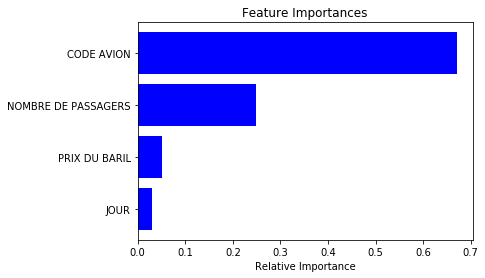

In [157]:
import matplotlib.pyplot as plt

features=X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')